In [1]:
#Import of libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Configuration
#Activate interactive shell
%config InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Import the csv file that holds the exported data from simulating PID controller in OpenModelica
dfOpenModPID = pd.read_csv('datafiles/exportedPIDsimulationFromOpenModelica.csv')

# Rename column names of datafram
dfOpenModPID.rename(columns = {'airHeaterTextWithIO.u_ext':'controlSignal',
                               'airHeaterTextWithIO.T_Out_ext':'outputTemperature',
                              'airHeaterTextWithIO.T_amb_ext':'ambienteTemperature'}, inplace = True)
   

# Import the csv file that holds the simulation data from simulating PID controller in Python with FMU
dfFMUpythonPID = pd.read_csv("datafiles/airHeaterPIDsimulation.csv")

In [4]:
# Remove the percentiles from the output and display stats
perc = []
dfOpenModPID.describe(percentiles=perc)
dfFMUpythonPID.describe(percentiles=perc)

,time,controlSignal,outputTemperature,ambienteTemperature,Reference.y
count,600008.000000,600008.000000,600008.000000,600008.000000,600008.000000
mean,299.999177,1.477942,23.279399,18.333336,23.333322
std,173.205508,0.947084,2.386166,0.745359,2.357028
min,0.000000,0.000000,19.632542,18.000000,20.000000
50%,299.997500,1.999926,25.000000,18.000000,25.000000
max,600.000000,5.000000,25.942111,20.000000,25.000000


,# time,controlSignal,outputTemperature,ambienteTemperature
count,600001.000000,600001.000000,600001.000000,600001.000000
mean,300.001000,1.485131,23.304572,18.333336
std,173.205514,0.975682,2.411911,0.745359
min,0.001000,0.000000,19.632972,18.000000
50%,300.001000,1.999989,25.000000,18.000000
max,600.001000,5.000000,26.926412,20.000000


In [5]:
# Drop last 7 lines from OpenModelica datafram to make both frames at equal length
# Number of rows to drop
n = 7
 
# Dropping last n rows using drop
dfOpenModPID.drop(dfOpenModPID.tail(n).index,
        inplace = True)

In [6]:
# Generate a new dataframe to evaluate the difference between the different FMUs temperature output and the Modelica simulation
dfTFMU_PID_diff = dfOpenModPID[['time']].copy()

# Calculate the difference between Python and OpenModelica - Control signal
dfTFMU_PID_diff['ControlSignalDiff'] = dfFMUpythonPID['controlSignal'] - dfOpenModPID['controlSignal']

# Calculate the difference between Python and OpenModelica - Output temperature
dfTFMU_PID_diff['OutputTemperatureDiff'] = dfFMUpythonPID['outputTemperature'] - dfOpenModPID['outputTemperature']

# Calculate the difference between Python and OpenModelica - Ambiente temperature
dfTFMU_PID_diff['AmbienteTemperature'] = dfFMUpythonPID['ambienteTemperature'] - dfOpenModPID['ambienteTemperature']

Text(0.5, 1.0, 'Plot of the PID from OpenModelica and Python based on FMU')

(15.0, 28.0)

(-0.2, 20.0)

Text(0.5, 0, 'Time [s]')

Text(0, 0.5, 'Temperature [deg C]')

Text(0, 0.5, 'Control Signal [V]')

(0.0, 400.0)

(0.0, 400.0)

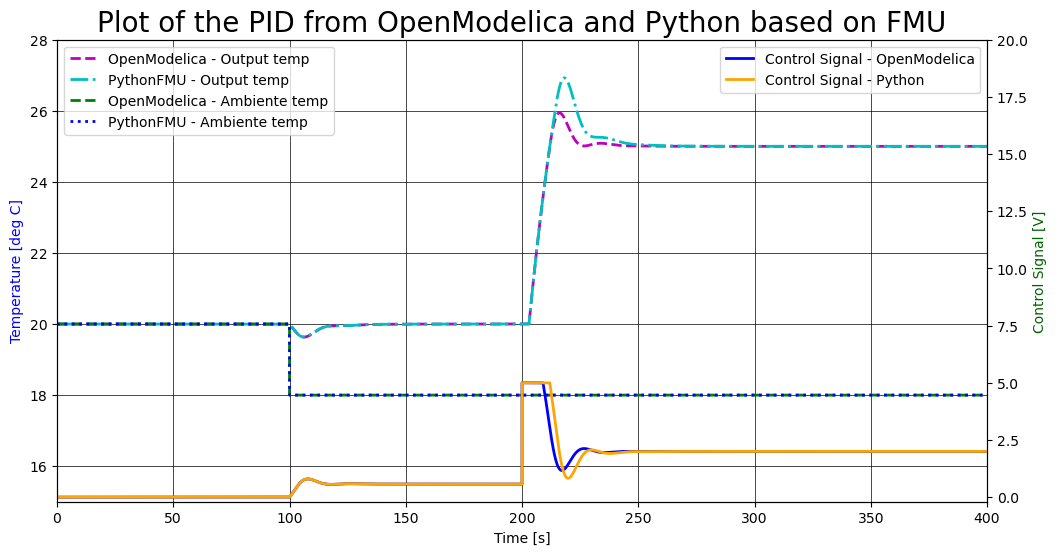

In [7]:
# Plotting of the output temperature and control signal for both FMU and Modelica model
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Plot of the PID from OpenModelica and Python based on FMU', fontsize=20)

# convert to dual y-axises
ax2 = ax1.twinx()

#Range of both X-axises
ax1.set_ylim(15, 28);
ax2.set_ylim(-0.2, 20);

# Set up the axis labels
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temperature [deg C]', color='b')
ax2.set_ylabel('Control Signal [V]', color='darkgreen')

# Customize the major grid (outer grid)
ax1.grid(which='both', linestyle='-', linewidth='0.5', color='black')

# Set up data to be plotted with additional parameters
ax1.plot(dfTFMU_PID_diff.time, dfOpenModPID.outputTemperature,  'm', linestyle='--', label='OpenModelica - Output temp', linewidth=2)
ax1.plot(dfTFMU_PID_diff.time, dfFMUpythonPID.outputTemperature,  'c', linestyle='-.', label='PythonFMU - Output temp', linewidth=2)
ax1.plot(dfTFMU_PID_diff.time, dfOpenModPID.ambienteTemperature,  'g', linestyle='--', label='OpenModelica - Ambiente temp', linewidth=2)
ax1.plot(dfTFMU_PID_diff.time, dfFMUpythonPID.ambienteTemperature,  'b', linestyle=':', label='PythonFMU - Ambiente temp', linewidth=2)

ax2.plot(dfTFMU_PID_diff.time, dfOpenModPID.controlSignal, 'blue', linestyle='-', label='Control Signal - OpenModelica', linewidth=2)
ax2.plot(dfTFMU_PID_diff.time, dfFMUpythonPID.controlSignal, 'orange', linestyle='-', label='Control Signal - Python', linewidth=2)

# Set x-axis limits to include only data up to 300 seconds
ax1.set_xlim(0, 400)
ax2.set_xlim(0, 400)

# Configure placement of data legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save a copy of the plot
plt.savefig('plots/pltComparePyFMUandOpenModPID.png', dpi=300, bbox_inches='tight')

plt.show()

Text(0.5, 1.0, 'Difference Between Modelica Simulations and Different FMUs')

(-2.5, 2.5)

(-2.0, 10.0)

Text(0.5, 0, 'Time [s]')

Text(0, 0.5, 'Temperature [deg C]')

Text(0, 0.5, 'Control Signal [V]')

(0.0, 400.0)

(0.0, 400.0)

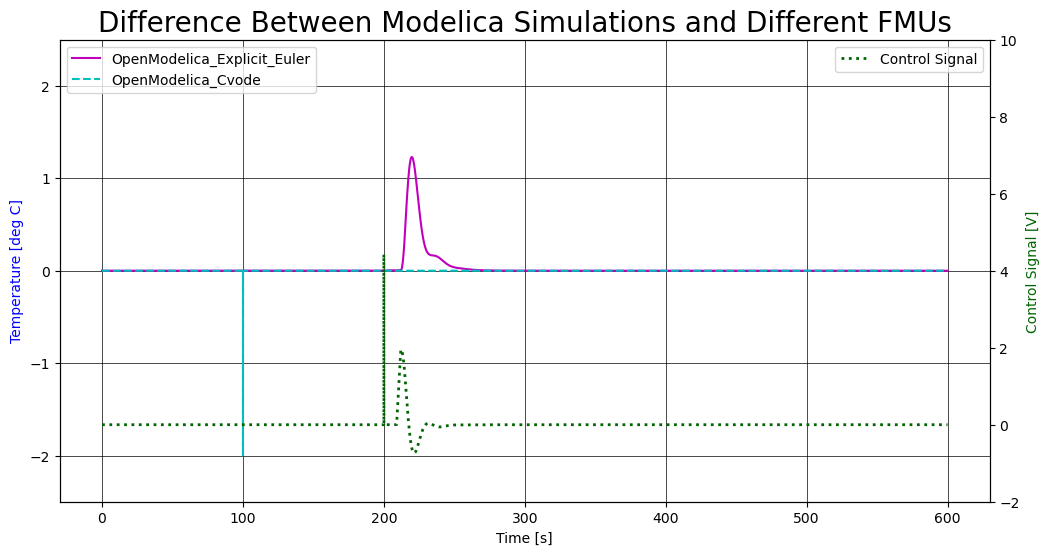

In [8]:
# Plotting of the output difference in temperature from the FMUs and Dymola reference simulations
fig, ax3 = plt.subplots(figsize=(12, 6));

# Plotting of the output difference in temperature and control signal
plt.title('Difference Between Modelica Simulations and Different FMUs', fontsize=20);

# convert to dual y-axises
ax4 = ax3.twinx();

#Range of both X-axises
ax3.set_ylim(-2.5, 2.5);
ax4.set_ylim(-2, 10);

# Set up the axis labels
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Temperature [deg C]', color='b')
ax4.set_ylabel('Control Signal [V]', color='darkgreen')

# Customize the major grid (outer grid)
ax3.grid(which='both', linestyle='-', linewidth='0.5', color='black')

# Set up data to be plotted with additional parameters
ax3.plot(dfTFMU_PID_diff.time, dfTFMU_PID_diff.OutputTemperatureDiff, 'm-', label='OpenModelica_Explicit_Euler', linewidth=1.5)
ax3.plot(dfTFMU_PID_diff.time, dfTFMU_PID_diff.AmbienteTemperature, 'c', linestyle='--', label='OpenModelica_Cvode', linewidth=1.5)

ax4.plot(dfTFMU_PID_diff.time, dfTFMU_PID_diff.ControlSignalDiff, 'darkgreen', linestyle=':', label='Control Signal', linewidth=2)

# Configure placement of data legends
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

# Set x-axis limits to include only data up to 300 seconds
ax3.set_xlim(0, 400)
ax4.set_xlim(0, 400)

# Save a copy of the plot
plt.savefig('plots/pltCompareDIFFPyFMUandOpenModPID.png', dpi=300, bbox_inches='tight')

plt.show()